100%|████████████████████████████████████████████████████████████████████████████████| 122k/122k [00:01<00:00, 100kB/s]

Extracting files...


Path to dataset files: C:\Users\muzam\.cache\kagglehub\datasets\yasserh\walmart-dataset\versions\1
Data shape: (6435, 8)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


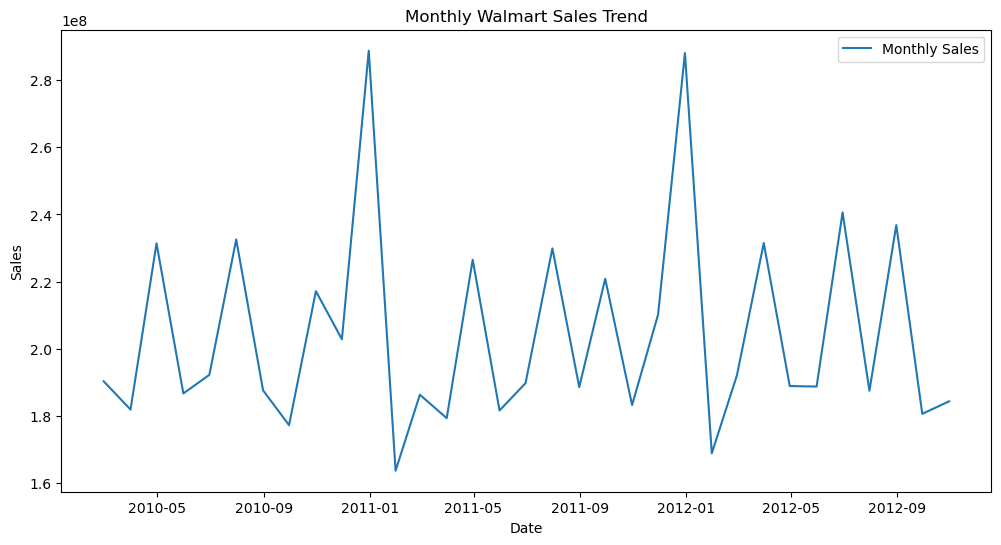

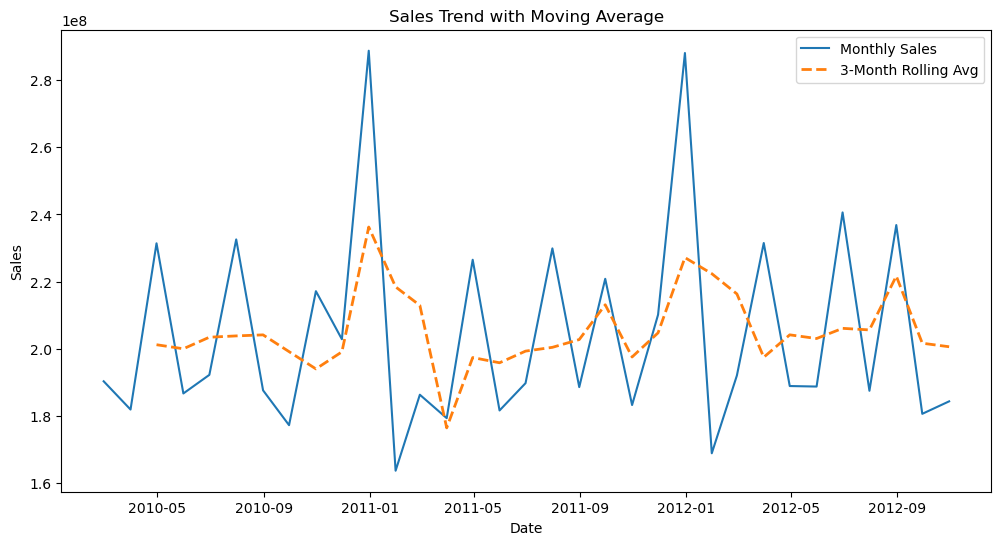

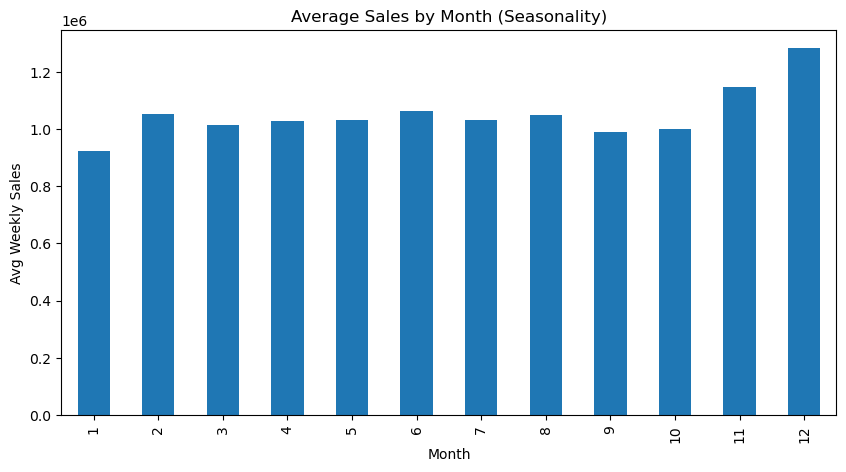

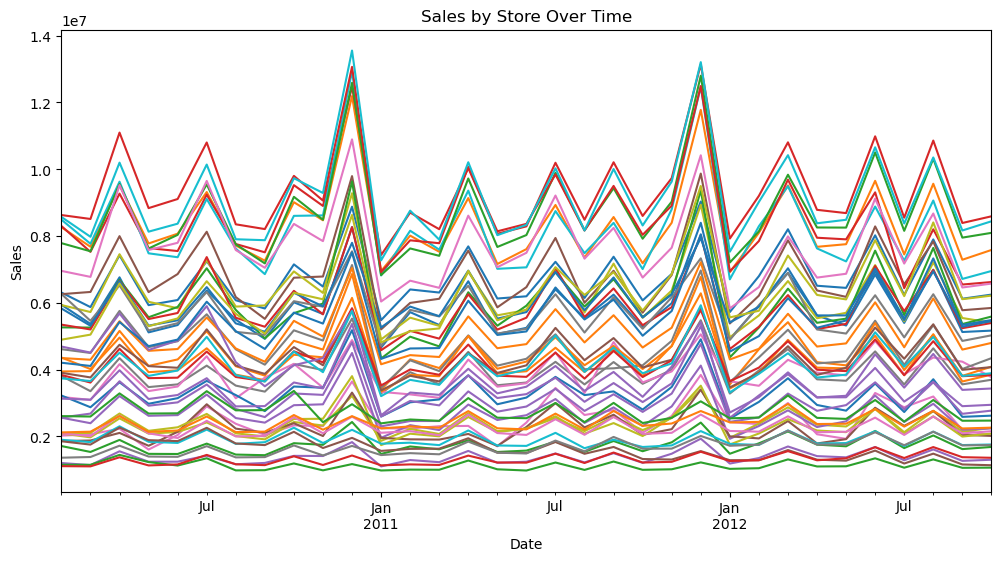

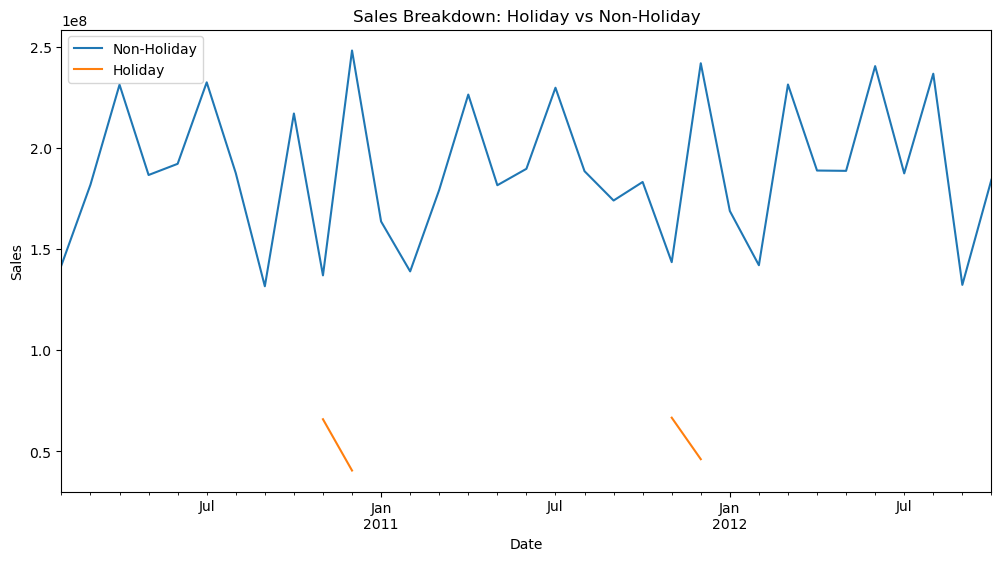

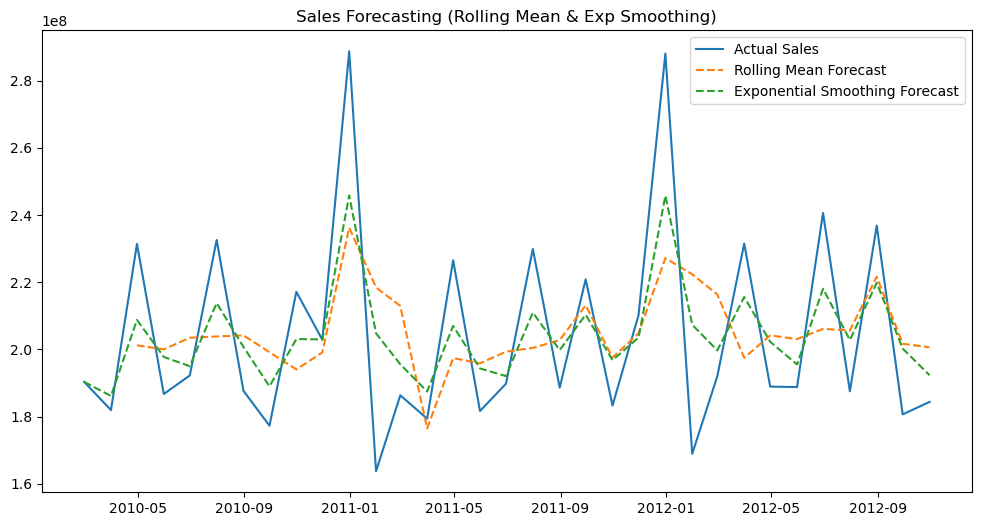

In [13]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import os


path = kagglehub.dataset_download("yasserh/walmart-dataset")
print("Path to dataset files:", path)


file_path = os.path.join(path, "Walmart.csv")
df = pd.read_csv(file_path)


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

print("Data shape:", df.shape)
print(df.columns)


monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, label="Monthly Sales")
plt.title("Monthly Walmart Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Monthly Sales")
plt.plot(rolling_avg, label="3-Month Rolling Avg", linewidth=2, linestyle="--")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


df['Month'] = df['Date'].dt.month
seasonal_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
seasonal_sales.plot(kind='bar')
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.show()

region_sales = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Store'])['Weekly_Sales'].sum().unstack()

region_sales.plot(legend=False, figsize=(12,6))
plt.title("Sales by Store Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


holiday_sales = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Holiday_Flag'])['Weekly_Sales'].sum().unstack()

holiday_sales.plot(figsize=(12,6))
plt.title("Sales Breakdown: Holiday vs Non-Holiday")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Non-Holiday", "Holiday"])
plt.show()


rolling_forecast = monthly_sales.rolling(window=3).mean()
exp_smooth = monthly_sales.ewm(span=3, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Actual Sales")
plt.plot(rolling_forecast, label="Rolling Mean Forecast", linestyle="--")
plt.plot(exp_smooth, label="Exponential Smoothing Forecast", linestyle="--")
plt.title("Sales Forecasting (Rolling Mean & Exp Smoothing)")
plt.legend()
plt.show()


In [11]:
!pip install kagglehub


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import os


path = kagglehub.dataset_download("yasserh/walmart-dataset")
print("Path to dataset files:", path)


file_path = os.path.join(path, "Walmart.csv")
df = pd.read_csv(file_path)


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

print("Data shape:", df.shape)
print(df.columns)


monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, label="Monthly Sales")
plt.title("Monthly Walmart Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Monthly Sales")
plt.plot(rolling_avg, label="3-Month Rolling Avg", linewidth=2, linestyle="--")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


df['Month'] = df['Date'].dt.month
seasonal_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
seasonal_sales.plot(kind='bar')
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.show()

region_sales = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Store'])['Weekly_Sales'].sum().unstack()

region_sales.plot(legend=False, figsize=(12,6))
plt.title("Sales by Store Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


holiday_sales = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Holiday_Flag'])['Weekly_Sales'].sum().unstack()

holiday_sales.plot(figsize=(12,6))
plt.title("Sales Breakdown: Holiday vs Non-Holiday")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Non-Holiday", "Holiday"])
plt.show()


rolling_forecast = monthly_sales.rolling(window=3).mean()
exp_smooth = monthly_sales.ewm(span=3, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Actual Sales")
plt.plot(rolling_forecast, label="Rolling Mean Forecast", linestyle="--")
plt.plot(exp_smooth, label="Exponential Smoothing Forecast", linestyle="--")
plt.title("Sales Forecasting (Rolling Mean & Exp Smoothing)")
plt.legend()
plt.show()


